In [7]:
%load_ext autoreload
%autoreload 2
import edhec_risk_kit as erk
import pandas as pd
import numpy as np

ind_return = erk.get_ind_returns()  ## 해당 산업의 수익률(월 기준)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
ind_size = erk.get_ind_size()  ## 해당 산업 기업의 평균 사이즈
ind_nfirms = erk.get_ind_nfirms()  ## 해당 산업의 기업 수

In [9]:
ind_mktcap = ind_nfirms * ind_size  ## 산업 비중

In [10]:
ind_mktcap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


In [11]:
total_mktcap = ind_mktcap.sum(axis="columns")  ## 시장 전체 크기

<AxesSubplot:>

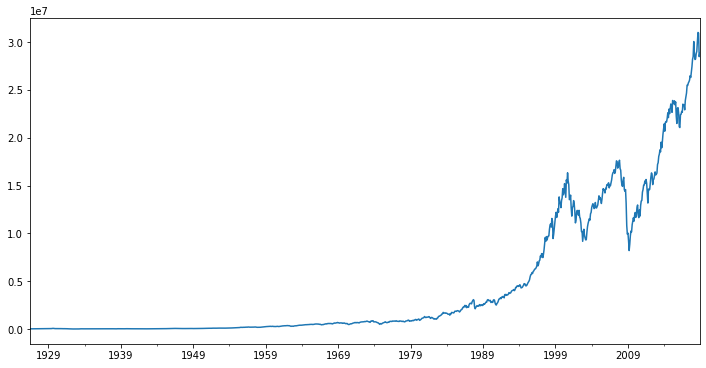

In [13]:
total_mktcap.plot(figsize=(12,6))

In [21]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")  ## 각 산업이 시장에서 차지하는 비율
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [23]:
ind_capweight["1926"].sum(axis="columns")  ## 각 산업의 비중 총합은 당연히 1

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<AxesSubplot:>

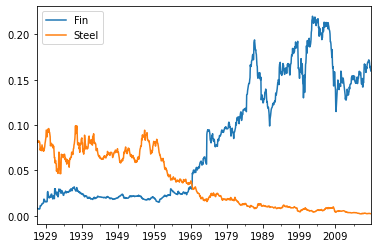

In [26]:
ind_capweight[["Fin", "Steel"]].plot()  ## 해당 산업의 시장대비 크기 변화

<AxesSubplot:>

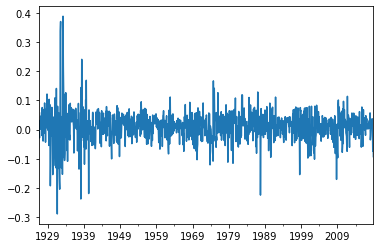

In [33]:
total_market_return = (ind_capweight * ind_return).sum(axis="columns")  ## 해당 연월에 시장수익률
total_market_return.plot()

<AxesSubplot:>

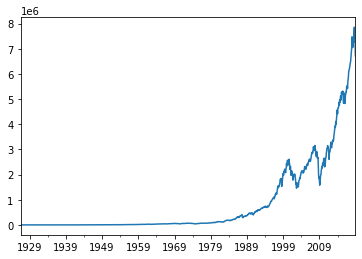

In [35]:
total_market_index = erk.drawdown(total_market_return).Wealth
## MarketIndex는 그냥 상수에다가 Market return cumprod한 거(def drawdown에서 Wealth값)
total_market_index.plot()

<AxesSubplot:>

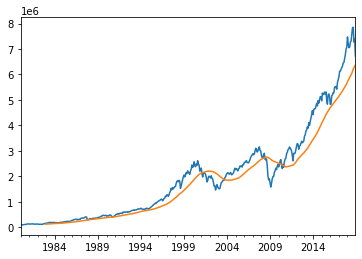

In [38]:
total_market_index["1980":].plot()
total_market_index["1980":].rolling(window=36).mean().plot()  ## 36개월 이동평균선

In [39]:
total_market_return

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
             ...   
2018-08    0.036951
2018-09    0.002108
2018-10   -0.074292
2018-11    0.019003
2018-12   -0.092911
Freq: M, Length: 1110, dtype: float64

<AxesSubplot:>

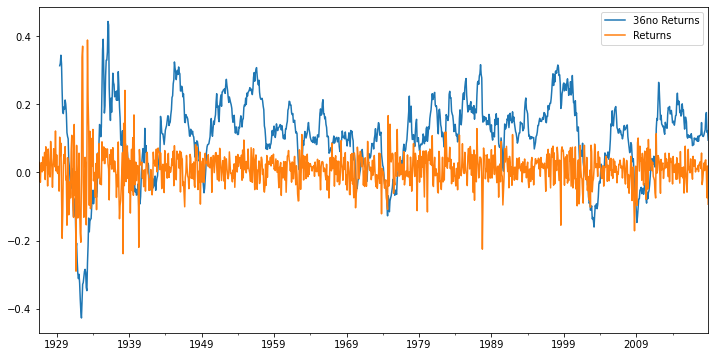

In [44]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
## 지난 36개월 total_market_return의 3년 간 평균 수익률 계산.(3년 수익률))
tmi_tr36rets.plot(figsize=(12,6), legend=True, label="36no Returns")
total_market_return.plot(legend=True, label="Returns")

### Rolling Correlation - along with MultiIndexes and .groupby

In [46]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [48]:
ts_corr.shape  ## 1110*30 행이 생성됨. 각 날짜마다 30*30 corr 계산

(33300, 30)

In [49]:
ind_return.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [53]:
ts_corr.index.names = ['date', 'industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [54]:
ind_tr36corr = ts_corr.groupby(level="date").apply(lambda cormat: cormat.values.mean())
## "date"를 기준으로 correlation의 평균을 구함
## ex. ''ts_corr.loc["2018-12"].values.mean()'' --> 2018-12의 average corr: 0.4795

<AxesSubplot:xlabel='date'>

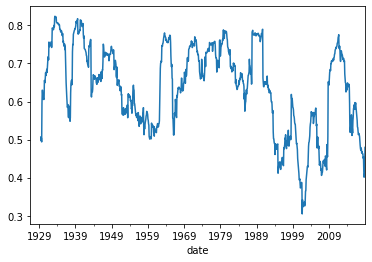

In [71]:
ind_tr36corr.plot()

<AxesSubplot:label='59f6d848-d429-4434-9735-205d6c7806bb'>

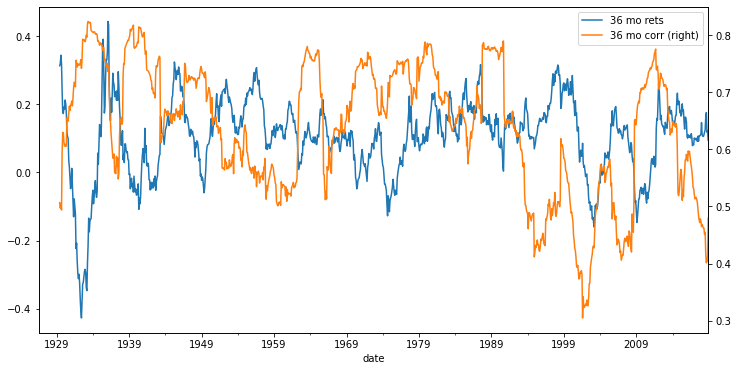

In [74]:
tmi_tr36rets.plot(figsize=(12,6), label="36 mo rets", legend=True)
ind_tr36corr.plot(label="36 mo corr", legend=True, secondary_y=True)

지난 36개월 간 수익률과 상관계수의 그래프 -->  시장이 크게 하락할 때 상관계수가 상승

시장이 박살날 땐 포트폴리오를 다양화해도 도움이 안된다.

<AxesSubplot:label='1696393d-85ea-4d91-8ecd-8a7d8dff683d'>

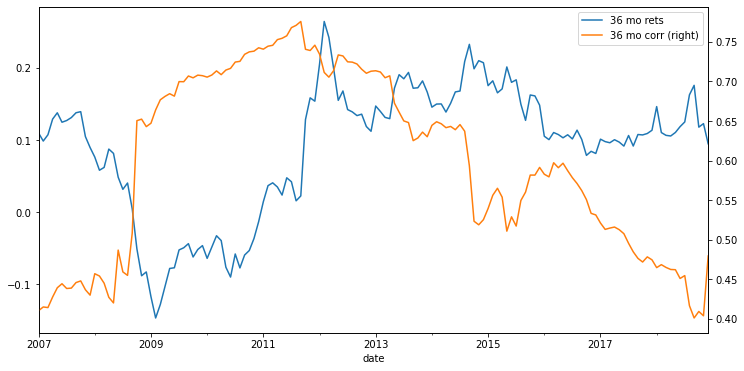

In [75]:
tmi_tr36rets["2007":].plot(figsize=(12,6), label="36 mo rets", legend=True)
ind_tr36corr["2007":].plot(label="36 mo corr", legend=True, secondary_y=True)

In [76]:
tmi_tr36rets.corr(ind_tr36corr)

-0.28010065062884126

In [82]:
tmi_return = erk.get_total_market_index_returns()

In [83]:
tmi_return

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
             ...   
2018-08    0.036951
2018-09    0.002108
2018-10   -0.074292
2018-11    0.019003
2018-12   -0.092911
Freq: M, Length: 1110, dtype: float64

# Implementing Portfolio Insurance(CPPI) and Drawdown Constraints

그러니까 보호장치를 만들자 -> CPPI

In [84]:
risky_r = ind_return["2000":][["Steel", "Fin", "Beer"]]  ## 리스크자산 수익률
safe_r = pd.DataFrame().reindex_like(risky_r)  ## 안전자산 수익률

In [86]:
safe_r.shape

(228, 3)

In [97]:
safe_r[:] = 0.03/12
start = 1000
floor = 0.8

1. Cushion - asset value - floor value
2. 안전자산과 리스크자산 비율 계산 -> m * risk_budget
3. 비율에 따라서 Asset value 다시 계산

In [95]:
def compound1(r):
    return (1+r).prod()-1

def compound2(r):
    return np.expm1(np.log1p(r).sum())

## log(1+r)은 모든 array값에 +1이라는 loop 과정을 거침. --> O(n * 1)
## log1p는 그 과정을 최적화 해 준 커맨드(expm1도 같음)

In [92]:
%timeit compound1(risky_r)

414 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [94]:
%timeit compound2(risky_r)

363 µs ± 8.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [96]:
risky_r

,Steel,Fin,Beer
2000-01,-0.0277,-0.0442,-0.0228
2000-02,0.0684,-0.0849,-0.1164
2000-03,0.0349,0.1669,0.0013
2000-04,-0.0084,-0.0425,0.0368
2000-05,-0.0492,0.0506,0.1187
...,...,...,...
2018-08,-0.0323,0.0245,-0.0186
2018-09,-0.0067,-0.0193,0.0019
2018-10,-0.1161,-0.0545,-0.0157
2018-11,-0.0300,0.0289,0.0579


In [98]:
dates = risky_r.index  ## 날짜
n_steps = len(dates)
account_value = start  ## 처음 잔고
floor_value = start*floor  ## Floor 기준값
m = 3
account_history = pd.DataFrame().reindex_like(risky_r)  ## 잔고가 어떻게 변하는지 각 날짜마다 기록
cushion_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)

for step in range(n_steps):
    cushion = (account_value - floor_value)/account_value  ## 퍼센티지로 표현
    risky_w = m*cushion  ## 리스크자산의 비중
    risky_w = np.minimum(risky_w, 1)  ## 리스크자산 비중이 1 초과하지 않도록 함
    risky_w = np.maximum(risky_w, 0)  ## 리스크자산 비중이 0 미만으로 가지 않도록 함 (레버리지가 없다는 말)
    safe_w = 1 - risky_w
    risky_alloc = account_value*risky_w  ## 잔고에서 리스크자산
    safe_alloc = account_value*safe_w  ## 잔고에서 안전자산
    
    ## 특정 시점[step]에 자산가치
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
    
    ## 데이터 업데이트
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value

In [99]:
account_history.head()

,Steel,Fin,Beer
2000-01,984.380000,974.480000,987.320000
2000-02,1023.292876,931.167544,922.971256
2000-03,1047.555176,998.187296,924.835988
2000-04,1042.079009,973.927479,939.993701
2000-05,1007.137753,1001.460033,991.145489


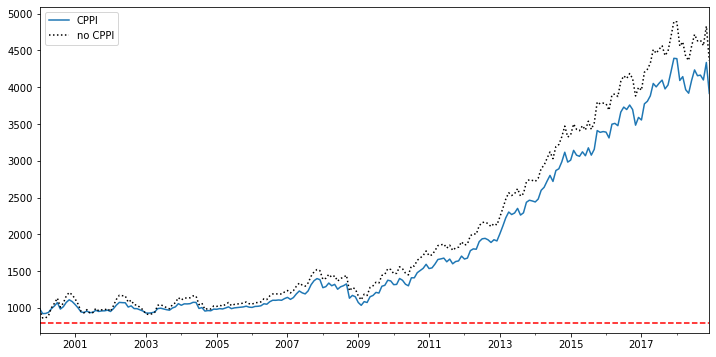

In [107]:
risky_wealth = start * (1+risky_r).cumprod()  ## CPPI 안했을 때 자산가치

ax = account_history["Beer"].plot(figsize=(12,6), label="CPPI", legend=True)
risky_wealth["Beer"].plot(ax=ax, label="no CPPI", legend=True, style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

<AxesSubplot:>

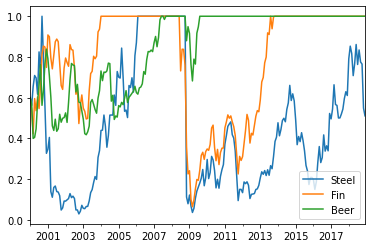

In [110]:
risky_w_history.plot()

## Beer은 2009년 쯔음 이후로 리스크자산 비중이 100%임 -> CPPI한 거랑 안 한 거랑 똑같음

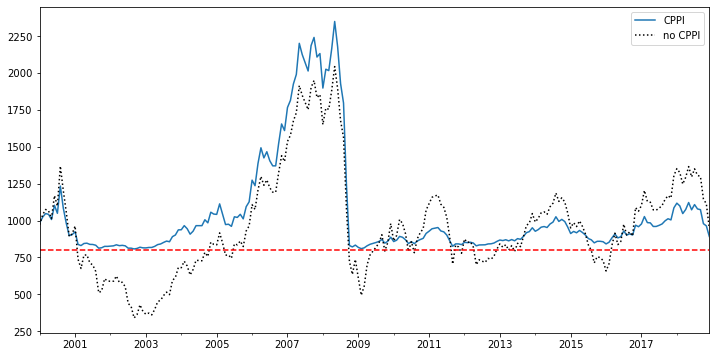

In [112]:
ind = "Steel"
ax = account_history[ind].plot(figsize=(12,6), label="CPPI", legend=True)
risky_wealth[ind].plot(ax=ax, label="no CPPI", legend=True, style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

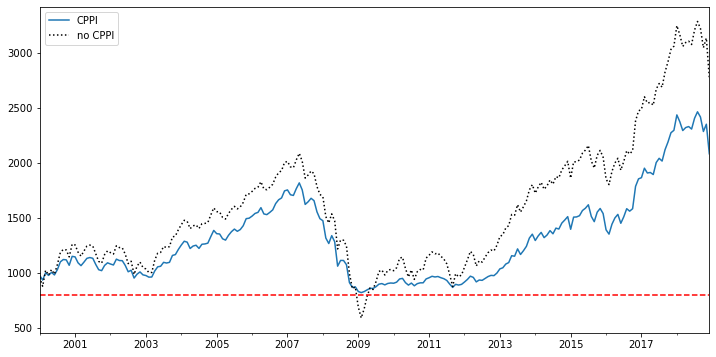

In [109]:
ind = "Fin"
ax = account_history[ind].plot(figsize=(12,6), label="CPPI", legend=True)
risky_wealth[ind].plot(ax=ax, label="no CPPI", legend=True, style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

In [113]:
erk.summary_stats(risky_r)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
Steel,-0.002790,0.312368,-0.326334,4.144381,0.150139,0.208117,-0.102567,-0.758017
Fin,0.055166,0.192909,-0.533218,4.995534,0.091224,0.132175,0.126718,-0.718465
Beer,0.080598,0.138925,-0.493545,4.173881,0.063015,0.091442,0.354314,-0.271368


In [118]:
btr = erk.run_cppi(risky_r)
erk.summary_stats(btr["Wealth"].pct_change().dropna())  ## "Wealth"값만 퍼센트(수익률)로 환산해서 계산

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
Steel,-0.005167,0.174180,-1.995143,17.110190,0.091995,0.130153,-0.196750,-0.655198
Fin,0.040894,0.131678,-0.946504,6.051414,0.065535,0.091621,0.080352,-0.549673
Beer,0.075544,0.115462,-0.669250,4.760879,0.052923,0.074908,0.383772,-0.259582


CPPI --> MDD, VaR, Vol을 줄여줌! (리스크를 줄여준다는 이야기)

<AxesSubplot:>

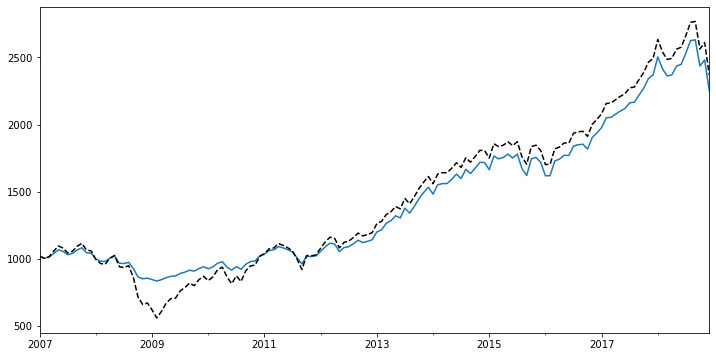

In [120]:
btr = erk.run_cppi(tmi_return["2007":])
ax = btr["Wealth"].plot(figsize=(12,6), legend=False)
btr["Risky Wealth"].plot(ax=ax, style='k--', legend=False)

In [121]:
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
R,0.073411,0.150463,-0.734939,4.523488,0.071592,0.096315,0.280618,-0.499943


CPPI 적용 안 한 경우

In [123]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
R,0.069416,0.100381,-0.588292,3.740932,0.045678,0.062953,0.382052,-0.229683


CPPI 적용 한 경우

# Drawdown Constraint

<AxesSubplot:>

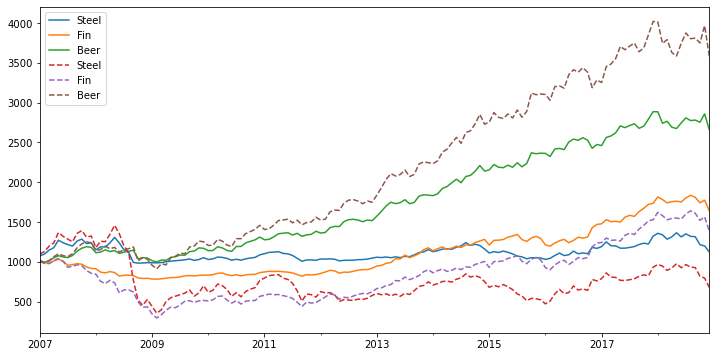

In [130]:
btr = erk.run_cppi(ind_return["2007":][["Steel", "Fin", "Beer"]], drawdown=0.25)
## MDD를 맥시멈 자산value의 25%로 제한!

ax = btr["Wealth"].plot(figsize=(12,6))
btr["Risky Wealth"].plot(ax=ax, style='--')

In [128]:
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.459951,4.782828,0.152288,0.203837,-0.221642,-0.758017
Fin,0.027364,0.212204,-0.695200,4.621401,0.105744,0.149862,-0.012370,-0.718465
Beer,0.111554,0.127971,-0.670797,4.650878,0.056497,0.077388,0.620132,-0.271368


In [129]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
Steel,0.003784,0.097073,-0.441089,5.220481,0.047371,0.066991,-0.262958,-0.248059
Fin,0.041975,0.085028,-0.355163,4.153860,0.038342,0.054111,0.136964,-0.243626
Beer,0.084375,0.086263,-0.744111,4.571533,0.037937,0.051189,0.613413,-0.161186
